#### Caitlin Rosiere "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

### Data cleaning & transformation

In [1]:
# Import packages
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

from scipy import stats

from sklearn.ensemble import RandomForestClassifier

C:\Users\caitl\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in data
xlsx = pd.ExcelFile('contest data.xlsx')
df1 = pd.read_excel(xlsx, 'calibration')
df2 = pd.read_excel(xlsx, 'validation')
df1.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
df1 = df1.replace('\s+', np.nan, regex=True)
df1.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [5]:
df1.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [6]:
df1 = df1.drop(['CHILD', 'SPORT', 'COMP', 'AGE'], axis = 1)
df1.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,4.0,1.0,1.0,65,194


In [7]:
df1['ATTENDED'] = df1['Y1G5'] + df1['Y1G4'] + df1['Y1G3'] + df1['Y1G2'] + df1['Y1G1']
df1 = df1.drop(['Y1G5', 'Y1G4', 'Y1G3', 'Y1G2', 'Y1G1'], axis=1)
df1.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,ATTENDED
0,580V74KT,0,15,8,1,4.0,0.0,1.0,77,203,3
1,298S54OK,1,15,3,1,NaN,0.0,0.0,53,68,2
2,268D25AO,1,15,11,1,2.0,0.0,1.0,50,38,2
3,312Q12WV,1,15,4,0,4.0,1.0,1.0,60,68,3
4,420R23VB,0,15,5,0,4.0,1.0,1.0,65,194,1


In [8]:
df1['INCOME'].describe()

count    7272.000000
mean        2.882151
std         1.843857
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: INCOME, dtype: float64

In [9]:
# Fill null values in income with the median (3.0)
df1 = df1.fillna({'INCOME': 3.0})
df1['INCOME'].describe()

count    9216.000000
mean        2.907010
std         1.638565
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: INCOME, dtype: float64

In [10]:
df1['GNDR'].describe()

count    8718.000000
mean        0.447236
std         0.497237
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GNDR, dtype: float64

In [11]:
df1 = df1.fillna({'GNDR': np.random.randint(0.0, 1.0)})
df1['GNDR'].describe()

count    9216.000000
mean        0.423069
std         0.494073
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GNDR, dtype: float64

In [12]:
df1['OWNHOME'].describe()

count    7217.000000
mean        0.718581
std         0.449722
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OWNHOME, dtype: float64

In [13]:
df1 = df1.fillna({'OWNHOME': np.random.randint(0.0, 1.0)})
df1['OWNHOME'].describe()

count    9216.000000
mean        0.562717
std         0.496078
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OWNHOME, dtype: float64

In [14]:
df1.isnull().sum()

FAKEID      0
Y2defect    0
Y1price     0
YEARS       0
BACKER      0
INCOME      0
GNDR        0
OWNHOME     0
PCTMARR     0
HOMEVAL     0
ATTENDED    0
dtype: int64

In [15]:
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [16]:
df2 = df2.drop(['AGE', 'CHILD', 'SPORT', 'COMP'], axis = 1)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,4,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,5,0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,,0,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,4,0,1,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,4,1,1,65,110


In [17]:
df2 = df2.replace('\s+', np.nan, regex=True)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,4.0,0.0,1.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,5.0,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,0.0,0.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,4.0,0.0,1.0,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,4.0,1.0,1.0,65,110


In [18]:
df2['ATTENDED'] = df2['Y2G5'] + df2['Y2G4'] + df2['Y2G3'] + df2['Y2G2'] + df2['Y2G1']
df2 = df2.drop(['Y2G5', 'Y2G4', 'Y2G3', 'Y2G2', 'Y2G1'], axis=1)
df2.head()

,FAKEID,Y3defect,Y2price,YEARS,BACKER,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,ATTENDED
0,580D24RR,NaN,15,5,0,4.0,0.0,1.0,66,64,2
1,179Q96NO,NaN,25,9,1,5.0,0.0,NaN,67,128,5
2,050Z45TB,NaN,15,5,1,NaN,0.0,0.0,52,113,3
3,399V18KY,NaN,15,1,0,4.0,0.0,1.0,65,81,2
4,009A52KP,NaN,25,9,1,4.0,1.0,1.0,65,110,2


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 11 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
INCOME      7127 non-null float64
GNDR        8977 non-null float64
OWNHOME     7590 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
ATTENDED    9542 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 820.1+ KB


In [20]:
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2price        0
YEARS          0
BACKER         0
INCOME      2415
GNDR         565
OWNHOME     1952
PCTMARR        0
HOMEVAL        0
ATTENDED       0
dtype: int64

In [21]:
df2['INCOME'].describe()

count    7127.000000
mean        2.879332
std         1.854905
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: INCOME, dtype: float64

In [22]:
# Fill null values in income with the median (3.0)
df2 = df2.fillna({'INCOME': 3.0})
df2['INCOME'].describe()

count    9542.000000
mean        2.909872
std         1.603910
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: INCOME, dtype: float64

In [23]:
df2['GNDR'].describe()

count    8977.000000
mean        0.429988
std         0.495102
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GNDR, dtype: float64

In [24]:
df2 = df2.fillna({'GNDR': np.random.randint(0.0, 1.0)})
df2['GNDR'].describe()

count    9542.000000
mean        0.404527
std         0.490826
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GNDR, dtype: float64

In [25]:
df2['OWNHOME'].describe()

count    7590.000000
mean        0.670751
std         0.469971
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OWNHOME, dtype: float64

In [26]:
df2 = df2.fillna({'OWNHOME': np.random.randint(0.0, 1.0)})
df2['OWNHOME'].describe()

count    9542.000000
mean        0.533536
std         0.498900
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OWNHOME, dtype: float64

In [27]:
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2price        0
YEARS          0
BACKER         0
INCOME         0
GNDR           0
OWNHOME        0
PCTMARR        0
HOMEVAL        0
ATTENDED       0
dtype: int64

### Model building, evaluation, & selection

In [28]:
df1.corr()

,Y2defect,Y1price,YEARS,BACKER,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,ATTENDED
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,0.010530,0.007248,-0.017937,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.071470,0.042429,-0.006664,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,-0.089712,-0.020403,-0.020362,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,-0.084987,-0.029201,-0.026875,0.032558,-0.064727,0.220321
INCOME,0.010530,0.071470,-0.089712,-0.084987,1.000000,0.064150,0.242074,0.132232,0.272878,-0.006969
GNDR,0.007248,0.042429,-0.020403,-0.029201,0.064150,1.000000,0.089864,0.054186,0.017835,-0.017660
OWNHOME,-0.017937,-0.006664,-0.020362,-0.026875,0.242074,0.089864,1.000000,0.094165,0.047500,0.001502
PCTMARR,-0.023869,0.008032,0.023691,0.032558,0.132232,0.054186,0.094165,1.000000,0.046570,0.021239
HOMEVAL,0.029722,0.095580,-0.049689,-0.064727,0.272878,0.017835,0.047500,0.046570,1.000000,-0.011751
ATTENDED,-0.164720,0.022259,0.217106,0.220321,-0.006969,-0.017660,0.001502,0.021239,-0.011751,1.000000


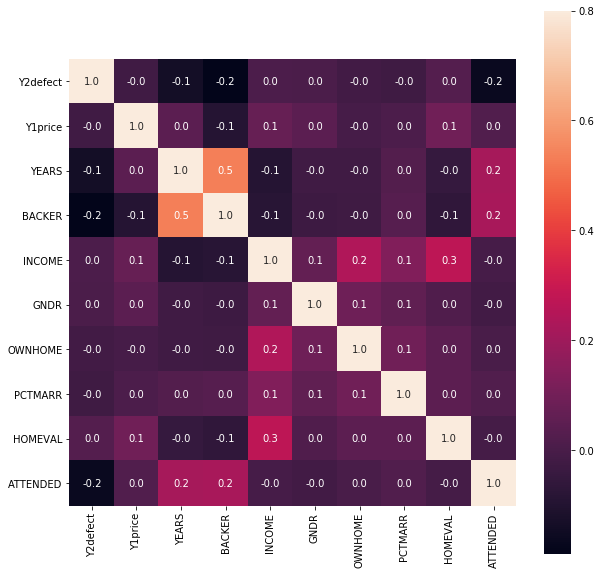

In [29]:
#display heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [30]:
y = df1['Y2defect']
X = df1[['BACKER', 'YEARS', 'ATTENDED']]

# evaluate the model by splitting into train and test sets & develop knn model named as knn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.579023508137
[[991 372]
 [792 610]]
             precision    recall  f1-score   support

          0       0.56      0.73      0.63      1363
          1       0.62      0.44      0.51      1402

avg / total       0.59      0.58      0.57      2765

0.581082679287


In [32]:
# declare variable for logistic regression analysis
y = df1['Y2defect']
X = df1[['BACKER', 'YEARS', 'ATTENDED', 'GNDR']]

# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.595298372514
[[844 519]
 [600 802]]
             precision    recall  f1-score   support

          0       0.58      0.62      0.60      1363
          1       0.61      0.57      0.59      1402

avg / total       0.60      0.60      0.60      2765

0.59563112334


In [42]:
y = df1['Y2defect']
X = df1.drop(['Y2defect', 'FAKEID'], axis=1)

clf = RandomForestClassifier(n_estimators=100)
clf=clf.fit(X, y)
clf.score(X,y)

0.99934895833333337

In [35]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.999348958333
[[4603    5]
 [   1 4607]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4608
          1       1.00      1.00      1.00      4608

avg / total       1.00      1.00      1.00      9216



In [44]:
y = df1['Y2defect']
X = df1[['YEARS', 'BACKER']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.59349005425
[[1048  315]
 [ 809  593]]
             precision    recall  f1-score   support

          0       0.56      0.77      0.65      1363
          1       0.65      0.42      0.51      1402

avg / total       0.61      0.59      0.58      2765

0.595929669699


Random Forest Classifier is overfitting. Best model is Decision Tree Classifier.

In [45]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), X.columns))

Features sorted by their rank:
[(0.2743, u'BACKER'), (0.7257, u'YEARS')]


In [46]:
# dataframe to show list of importance in variables
pd.DataFrame({'feature':X.columns, 'importance': dt.feature_importances_})

,feature,importance
0,YEARS,0.725677
1,BACKER,0.274323


In [47]:
#Predict class probabilities for X
dt.predict_proba(X)

array([[ 0.58467742,  0.41532258],
       [ 0.65158371,  0.34841629],
       [ 0.55486862,  0.44513138],
       ..., 
       [ 0.5399449 ,  0.4600551 ],
       [ 0.64197531,  0.35802469],
       [ 0.64197531,  0.35802469]])

In [48]:
validation = df2.drop(['Y3defect', 'FAKEID'], axis=1)
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 9 columns):
Y2price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
INCOME      9542 non-null float64
GNDR        9542 non-null float64
OWNHOME     9542 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
ATTENDED    9542 non-null int64
dtypes: float64(3), int64(6)
memory usage: 671.0 KB


In [49]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


### Model deployment

In [50]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

### Additional Exploration

In [52]:
# we use statsmodels for logit function
logit = sm.Logit(y, X) 
model_logit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.680359
         Iterations 4


In [54]:
for i in model_logit.predict():
    print i

0.403284385035
0.35637536738
0.432367276917
0.539782222471
0.54966876202
0.519922691449
0.539782222471
0.384253789152
0.365571057389
0.35637536738
0.559516231055
0.54966876202
0.374865828541
0.539782222471
0.412913953438
0.529864277614
0.403284385035
0.529864277614
0.539782222471
0.412913953438
0.539782222471
0.529864277614
0.393728779344
0.422610610033
0.393728779344
0.54966876202
0.539782222471
0.529864277614
0.54966876202
0.539782222471
0.54966876202
0.422610610033
0.422610610033
0.539782222471
0.569317086619
0.422610610033
0.35637536738
0.539782222471
0.374865828541
0.393728779344
0.412913953438
0.365571057389
0.539782222471
0.374865828541
0.569317086619
0.539782222471
0.54966876202
0.393728779344
0.35637536738
0.403284385035
0.569317086619
0.422610610033
0.432367276917
0.35637536738
0.569317086619
0.539782222471
0.432367276917
0.539782222471
0.432367276917
0.422610610033
0.54966876202
0.607909034559
0.412913953438
0.422610610033
0.529864277614
0.403284385035
0.374865828541
0.56931

0.374865828541
0.412913953438
0.393728779344
0.588749531715
0.529864277614
0.559516231055
0.422610610033
0.384253789152
0.529864277614
0.529864277614
0.422610610033
0.393728779344
0.393728779344
0.432367276917
0.539782222471
0.569317086619
0.412913953438
0.54966876202
0.35637536738
0.412913953438
0.559516231055
0.539782222471
0.569317086619
0.35637536738
0.422610610033
0.529864277614
0.519922691449
0.432367276917
0.569317086619
0.559516231055
0.529864277614
0.54966876202
0.384253789152
0.579063930659
0.403284385035
0.365571057389
0.539782222471
0.559516231055
0.529864277614
0.365571057389
0.569317086619
0.598366845549
0.422610610033
0.384253789152
0.539782222471
0.412913953438
0.539782222471
0.412913953438
0.529864277614
0.579063930659
0.529864277614
0.54966876202
0.539782222471
0.529864277614
0.403284385035
0.54966876202
0.588749531715
0.539782222471
0.529864277614
0.54966876202
0.559516231055
0.569317086619
0.432367276917
0.529864277614
0.432367276917
0.569317086619
0.422610610033
0.

0.559516231055
0.539782222471
0.393728779344
0.539782222471
0.384253789152
0.422610610033
0.35637536738
0.422610610033
0.569317086619
0.588749531715
0.559516231055
0.529864277614
0.412913953438
0.35637536738
0.588749531715
0.365571057389
0.374865828541
0.529864277614
0.384253789152
0.412913953438
0.384253789152
0.393728779344
0.412913953438
0.393728779344
0.35637536738
0.529864277614
0.559516231055
0.539782222471
0.54966876202
0.539782222471
0.374865828541
0.529864277614
0.432367276917
0.374865828541
0.384253789152
0.374865828541
0.432367276917
0.403284385035
0.529864277614
0.422610610033
0.422610610033
0.598366845549
0.412913953438
0.559516231055
0.539782222471
0.529864277614
0.403284385035
0.559516231055
0.412913953438
0.559516231055
0.539782222471
0.54966876202
0.422610610033
0.374865828541
0.432367276917
0.365571057389
0.422610610033
0.569317086619
0.365571057389
0.559516231055
0.422610610033
0.559516231055
0.579063930659
0.403284385035
0.432367276917
0.412913953438
0.374865828541


0.54966876202
0.432367276917
0.384253789152
0.559516231055
0.54966876202
0.529864277614
0.412913953438
0.412913953438
0.559516231055
0.539782222471
0.393728779344
0.412913953438
0.384253789152
0.432367276917
0.365571057389
0.539782222471
0.374865828541
0.432367276917
0.539782222471
0.412913953438
0.432367276917
0.35637536738
0.529864277614
0.529864277614
0.529864277614
0.539782222471
0.403284385035
0.519922691449
0.393728779344
0.579063930659
0.588749531715
0.529864277614
0.403284385035
0.588749531715
0.588749531715
0.35637536738
0.529864277614
0.393728779344
0.529864277614
0.432367276917
0.519922691449
0.529864277614
0.529864277614
0.588749531715
0.384253789152
0.403284385035
0.529864277614
0.579063930659
0.422610610033
0.365571057389
0.539782222471
0.35637536738
0.422610610033
0.403284385035
0.529864277614
0.35637536738
0.393728779344
0.569317086619
0.54966876202
0.35637536738
0.529864277614
0.35637536738
0.384253789152
0.422610610033
0.54966876202
0.529864277614
0.539782222471
0.393

0.529864277614
0.559516231055
0.374865828541
0.365571057389
0.432367276917
0.412913953438
0.519922691449
0.539782222471
0.422610610033
0.559516231055
0.374865828541
0.403284385035
0.539782222471
0.365571057389
0.529864277614
0.569317086619
0.539782222471
0.412913953438
0.54966876202
0.598366845549
0.579063930659
0.559516231055
0.529864277614
0.422610610033
0.432367276917
0.529864277614
0.579063930659
0.588749531715
0.529864277614
0.432367276917
0.569317086619
0.403284385035
0.529864277614
0.365571057389
0.374865828541
0.432367276917
0.432367276917
0.35637536738
0.559516231055
0.529864277614
0.374865828541
0.393728779344
0.35637536738
0.559516231055
0.412913953438
0.569317086619
0.461923929977
0.559516231055
0.559516231055
0.519922691449
0.432367276917
0.403284385035
0.519922691449
0.432367276917
0.412913953438
0.432367276917
0.529864277614
0.588749531715
0.35637536738
0.559516231055
0.54966876202
0.529864277614
0.384253789152
0.374865828541
0.432367276917
0.579063930659
0.393728779344


In [55]:
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print model_logit.summary()

                           Logit Regression Results                           
Dep. Variable:               Y2defect   No. Observations:                 9216
Model:                          Logit   Df Residuals:                     9214
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 May 2018   Pseudo R-squ.:                 0.01845
Time:                        19:39:31   Log-Likelihood:                -6270.2
converged:                       True   LL-Null:                       -6388.0
                                        LLR p-value:                 3.385e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
YEARS          0.0399      0.005      8.015      0.000       0.030       0.050
BACKER        -0.7107      0.050    -14.195      0.000      -0.809      -0.613


In [56]:
model_logit.pred_table()

array([[ 2691.,  1917.],
       [ 1817.,  2791.]])

In [57]:
print model_logit.conf_int()

               0         1
YEARS   0.030118  0.049615
BACKER -0.808863 -0.612598


In [58]:
print np.exp(model_logit.params)

YEARS     1.040672
BACKER    0.491285
dtype: float64
